In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.contrib.tensorboard.plugins import projector
from data_process import process_data

In [46]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

In [83]:
VOCAB_SIZE = 50000
BATCH_SIZE = 128
EMBED_SIZE = 50 
SKIP_WINDOW = 1 
NUM_SAMPLED = 64
LEARNING_RATE = 0.1
NUM_TRAIN_STEPS = 10000
SKIP_STEP = 200

In [84]:
batch_gen = process_data(VOCAB_SIZE, BATCH_SIZE, SKIP_WINDOW)

Dataset ready


In [85]:
with tf.name_scope('data'):
        center_words = tf.placeholder(tf.int32, shape=[BATCH_SIZE], name='center_words')
        target_words = tf.placeholder(tf.int32, shape=[BATCH_SIZE, 1], name='target_words')

In [86]:
with tf.name_scope('embedding_matrix'):
        embed_matrix = tf.Variable(tf.random_uniform([VOCAB_SIZE, EMBED_SIZE], -1.0, 1.0), 
                            name='embed_matrix')

In [87]:

with tf.name_scope('loss'):
        embed = tf.nn.embedding_lookup(embed_matrix, center_words, name='embed')


        nce_weight = tf.Variable(tf.truncated_normal([VOCAB_SIZE, EMBED_SIZE],
                                                    stddev=1.0 / (EMBED_SIZE ** 0.5)), 
                                                    name='nce_weight')
        nce_bias = tf.Variable(tf.zeros([VOCAB_SIZE]), name='nce_bias')

In [88]:
        
loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weight, 
                                            biases=nce_bias, 
                                            labels=target_words, 
                                            inputs=embed, 
                                            num_sampled=NUM_SAMPLED, 
                                            num_classes=VOCAB_SIZE), name='loss')


optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(loss)

In [99]:
    sess=tf.Session()
    sess.run(tf.global_variables_initializer())

    total_loss = 0.0 
    writer = tf.summary.FileWriter('./mygraph/no_frills2/', sess.graph)
    for index in range(NUM_TRAIN_STEPS):
        centers, targets = next(batch_gen)
        loss_batch, _ = sess.run([loss, optimizer], 
                                    feed_dict={center_words: centers, target_words: targets})
        total_loss += loss_batch
        if (index + 1) % SKIP_STEP == 0:
            print('Average loss at step {}: {:5.1f}'.format(index, total_loss / SKIP_STEP))
            total_loss = 0.0
        writer.close()
        

Average loss at step 199: 253.8
Average loss at step 399: 220.5
Average loss at step 599: 200.7
Average loss at step 799: 181.6
Average loss at step 999: 171.1
Average loss at step 1199: 161.7
Average loss at step 1399: 151.5
Average loss at step 1599: 152.1
Average loss at step 1799: 139.5
Average loss at step 1999: 135.2
Average loss at step 2199: 128.1
Average loss at step 2399: 127.8
Average loss at step 2599: 126.4
Average loss at step 2799: 113.0
Average loss at step 2999: 111.3
Average loss at step 3199: 111.3
Average loss at step 3399: 108.7
Average loss at step 3599: 108.7
Average loss at step 3799:  98.4
Average loss at step 3999:  93.8
Average loss at step 4199:  97.9
Average loss at step 4399:  96.1
Average loss at step 4599:  96.9
Average loss at step 4799:  89.9
Average loss at step 4999:  91.6
Average loss at step 5199:  91.6
Average loss at step 5399:  88.1
Average loss at step 5599:  93.5
Average loss at step 5799:  85.1
Average loss at step 5999:  81.5
Average loss at

In [100]:
from tensorflow.contrib.tensorboard.plugins import projector

In [101]:

final_embed_matrix = sess.run(embed_matrix)


embedding_var = tf.Variable(final_embed_matrix[:50], name='embedding')
sess.run(embedding_var.initializer)
config = projector.ProjectorConfig()
summary_writer = tf.summary.FileWriter('./mygraph2/no_frills/')


embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name


embedding.metadata_path = './mygraph/no_frills2/vocab2_1000.tsv'


projector.visualize_embeddings(summary_writer, config)


saver_embed = tf.train.Saver([embedding_var])
saver_embed.save(sess, './mygraph/no_frills2/skip-gram.ckpt', 1)
writer.close()

In [102]:
filename = "./processed/vocab_1000.tsv"

In [103]:
vocab = []
with open(filename) as text:
    for eachLine in text:
        vocab.extend(eachLine.strip().split(" "))
#print(len(vocab))

In [104]:
la = np.linalg

In [105]:
U, s, Vh = la.svd(final_embed_matrix, full_matrices=False)

In [106]:
%matplotlib inline
from matplotlib import pyplot as plt

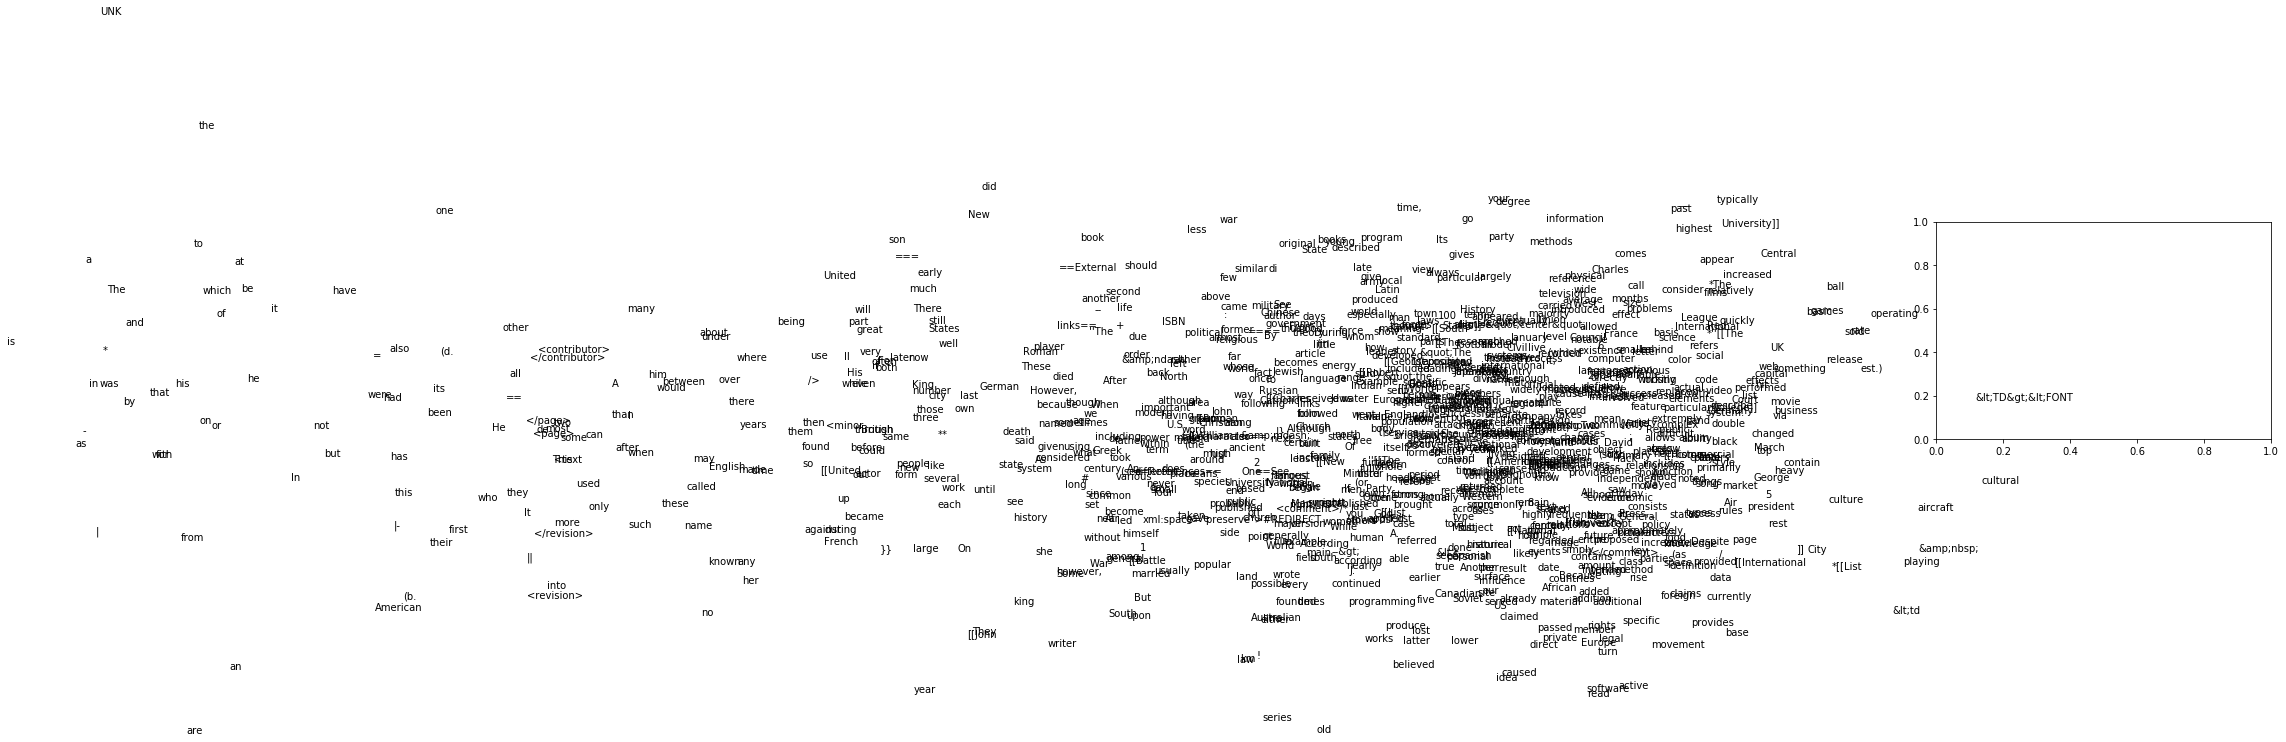

In [107]:
for i in range(len(vocab)):
    plt.text(100*U[i,0],100*U[i,1], vocab[i])

vocab[:50]